<a href="https://colab.research.google.com/github/deepakbharadwaj99/deepakbharadwaj99/blob/main/tata_motors_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [47]:
# Defining the stock symbol and the date range
symbol = 'TATAMOTORS.NS'
start_date = '2020-01-01'
end_date = '2022-01-01'

data = yf.download(symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [48]:
# Extracting Closing prices
data = data[['Close']]

# Normalizing data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

# Converting data into sequences for LSTM
sequence_length = 10  # Number of days to use for prediction
X, y = [], []

for i in range(len(data) - sequence_length):
    X.append(data['Close'].iloc[i:i+sequence_length])
    y.append(data['Close'].iloc[i+sequence_length])

X, y = np.array(X), np.array(y)

# Reshaping data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], sequence_length, 1))


<ipython-input-48-5f50086d827d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data[['Close']])


In [49]:
# dataset training size = 80%
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [50]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
13/13 [==============================] - 6s 12ms/step - loss: 0.0430
Epoch 2/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0084
Epoch 3/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 4/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 5/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 6/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 7/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 8/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 9/50
13/13 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 10/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 11/50
13/13 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 12/50
13/13 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 13/50
13/13 [==================

In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


4/4 [==============================] - 0s 6ms/step


In [52]:
y_pred_train = scaler.inverse_transform(y_pred_train)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [53]:
mse_train = mean_squared_error(y_train_actual, y_pred_train)
mse_test = mean_squared_error(y_test_actual, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')


Training MSE: 154.8348790247769
Test MSE: 816.5125728258389


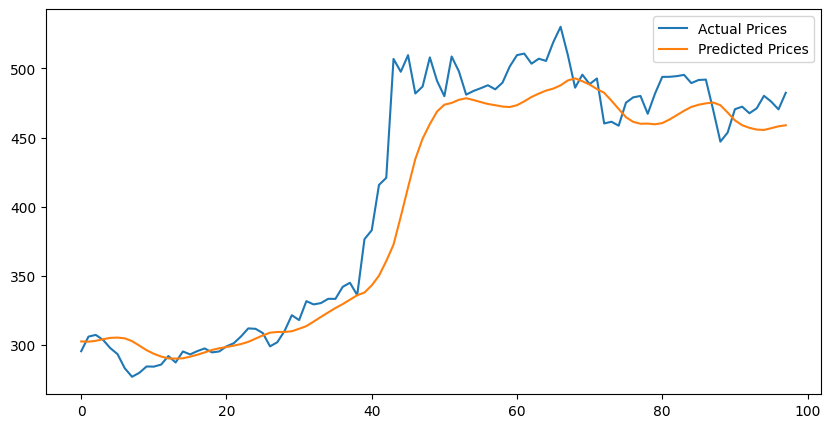

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(y_pred_test, label='Predicted Prices')
plt.legend()
plt.show()
